# Handling Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

    First way to handle missing value is to remove them CCA

    the second way is to impute them using univariate example
    ->num:->mean,remaining values ,end of bisection
    ->cat:->mode,missing value


    the third way is to impute them using multivariate example
    -> KNN imputation
        -> missing imputation MICE

    Assumptions for CCA

    1. Missing values are missing completely at random

    2. Advantages

        1. Easy to implement
        2. Preserve the distribution of the data


    3.Disadvantages:

        1. Does not preserve the correlation structure of the data
        2. it can remove the large amount of data
        3. the deployed model does not know how to handle missing values

When to use CCA
1. MCAR:- Missing completely at random
2. 5% of data is missing(not more than that)

In [2]:
df=pd.read_csv(r"C:\Users\devan\OneDriv"
               r"e\Desktop\ML Datasets and Notes\data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [6]:
'''only apply CCA to that part where total number of missing data is less than 5%'''
cols=['city_development_index','enrolled_university','education_level','experience','training_hours']

In [7]:
df.dropna(subset=cols,inplace=True)

In [8]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.541031
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline          12.530555
experience                 0.000000
company_size              29.786986
company_type              30.799674
training_hours             0.000000
target                     0.000000
dtype: float64

In [9]:
df.shape

(17182, 13)

In [10]:
df.value_counts()


enrollee_id  city      city_development_index  gender  relevent_experience      enrolled_university  education_level  major_discipline  experience  company_size  company_type    training_hours  target
33380        city_83   0.923                   Male    No relevent experience   no_enrollment        Graduate         STEM              14.0        10000+        Pvt Ltd         168.0           0.0       1
2            city_103  0.920                   Male    No relevent experience   no_enrollment        Phd              STEM              15.0        10000+        NGO             128.0           1.0       1
33337        city_89   0.925                   Male    Has relevent experience  no_enrollment        Graduate         STEM              20.0        10000+        Pvt Ltd         4.0             0.0       1
33330        city_103  0.920                   Male    Has relevent experience  no_enrollment        Graduate         STEM              11.0        500-999       Pvt Ltd         32.

# Numerical Imputation(UNIVARIATE)

# 1. mean
# 2. median
# 3. mode
# 4. end of distribution
# 5.Arbitrary value

In [11]:
titanic=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\titanic_toy.csv")

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [13]:
titanic.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [15]:
titanic.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [16]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train.isnull().mean()

Age       0.198034
Fare      0.054775
Family    0.000000
dtype: float64

In [18]:
X_train['Age'].fillna(X_train['Age'].mean(),inplace=True)

In [19]:
X_train.isnull().mean()

Age       0.000000
Fare      0.054775
Family    0.000000
dtype: float64

In [20]:
X_train['Fare'].fillna(X_train['Fare'].mean(),inplace=True)

In [21]:
X_train["Age"].fillna(X_train["Age"].median(),inplace=True)

In [22]:
# after that always check the variance of the data
# the data's will shrink if the shrink is extremely high then it is a red flag

In [23]:
titanic2=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\titanic_toy.csv")

In [24]:
# now filling the imputations using sklearn

In [25]:
X=titanic2.drop('Survived',axis=1)
y=titanic2['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [27]:
trf=ColumnTransformer([('imputer1',imputer1,['Age']),
('imputer2',imputer2,['Fare'])],remainder='passthrough')

In [28]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([29.])

In [30]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

# Arbitary imputation
    used for categorical data
    filled by filling the word missing

    the main DISADVANTAGE IS THAT

    it does not preserve the correlation structure of the data

    so it will ditort the PDE structure of the data

    this technique is used when the data is not missing completely at random(BUT NOT WIDELY USED IN THE REAL WORLD)

In [31]:
# for example
titanic3=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\titanic_toy.csv")

In [32]:
titanic3.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [33]:
titanic3.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [34]:
titanic3['Age'].fillna('99',inplace=True)

# END OF DISTRIBUTION imputation

just an extension of arbitary imputation

    you just take the end of the distribution

if the data is normal thats how it works

    mean+3*sd
    mean-3*sd

if the data is skewed thats how it works

    IQR Proximity
    mean+3*iqr
    mean-3*iqr

Advantages:

    1. Easy to implement

Disadvantages:

    1. Does not preserve the correlation structure of the data

    2. Does not preserve the distribution of the data

    3. Does not preserve the variance of the data

# Handling it for categorical data

    use most frequent as imputation(MODE)
    only done when the data is less than 10%

    use arbitary imputation(MISSING WALA)
    only done when the data is more than 10% it creates a new category then


# Random Sample Imputation


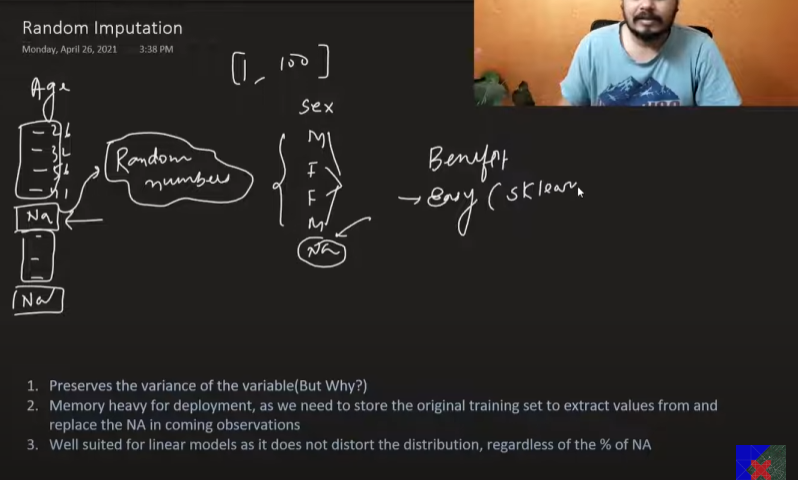